In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import re
import numpy as np

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model structure 

In [4]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

### Model save directory setting

In [6]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model save environment setting: Saving the model training result with the same name over epochs if the training performance improves. 

In [6]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

In [7]:
Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=300,  verbose=1, callbacks=[ModelSave])

Epoch 1/200
18/18 [==============================] - 2s 84ms/step - loss: 5.1459 - accuracy: 0.2910 - val_loss: 0.6881 - val_accuracy: 0.7323

Epoch 00001: val_loss improved from inf to 0.68812, saving model to ./Results\WineM.hdf5
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6356 - accuracy: 0.7645 - val_loss: 0.6408 - val_accuracy: 0.7700

Epoch 00002: val_loss improved from 0.68812 to 0.64083, saving model to ./Results\WineM.hdf5
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.8171 - val_loss: 0.3712 - val_accuracy: 0.8615

Epoch 00003: val_loss improved from 0.64083 to 0.37120, saving model to ./Results\WineM.hdf5
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.8968 - val_loss: 0.3046 - val_accuracy: 0.8892

Epoch 00004: val_loss improved from 0.37120 to 0.30464, saving model to ./Results\WineM.hdf5
Epoch 5/200
18/18 [==============================] - 0s 5ms/ste

### Model weight load and evaluate it 

In [14]:
WineRe = WineModel()
WineRe.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
print('Before loading weights')
print(WineRe.evaluate(X_test,Y_test))
print()

WineRe.load_weights(ModelSaveSameName)
print('After loading weights')
print(WineRe.evaluate(X_test,Y_test))

Before loading weights
41/41 [==============================] - 0s 2ms/step - loss: 17.9903 - accuracy: 0.2608
[17.93638801574707, 0.26384615898132324]

After loading weights
41/41 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9869
[0.04275638237595558, 0.986923098564148]


### Model save environment setting: Saving the model training result with a different name for each epoch if the training performance improves. 

In [11]:
Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

ModelSaveDiffName = save_path+'Epoch-{epoch:02d}_Loss-{loss:.4f}_ValLoss-{val_loss:.4f}-.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveDiffName, monitor='val_loss', verbose=0, save_best_only=True)

In [12]:
Wine.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200,  verbose=1, callbacks=[ModelSave])

Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 0.9774 - accuracy: 0.5379 - val_loss: 0.3142 - val_accuracy: 0.8631
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8871 - val_loss: 0.1878 - val_accuracy: 0.9477
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.9355 - val_loss: 0.1679 - val_accuracy: 0.9469
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9391 - val_loss: 0.1637 - val_accuracy: 0.9508
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9407 - val_loss: 0.1542 - val_accuracy: 0.9485
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9378 - val_loss: 0.1482 - val_accuracy: 0.9500
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9432 - val_loss: 0.1442 - val_accuracy: 0.9500
Epoch 8/200
2

### Plot loss graphs

Text(0, 0.5, 'loss')

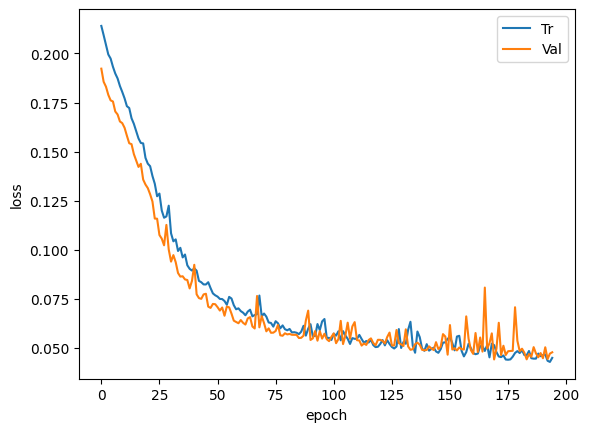

In [85]:
plt.plot(Wine.history.history['loss'][5:], label='Tr')
plt.plot(Wine.history.history['val_loss'][5:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Review saved model weights

In [21]:
FileList = os.listdir(save_path)
FileList = [re.split('-|_', i) for i in FileList if 'Val' in i] # select files with 'val'

FileListDF= pd.DataFrame(FileList)
FileListDF = FileListDF.drop(columns=[0,2,4,6])
FileListDF = FileListDF.rename(columns={1:'Epoch',3:'Loss',5:'VallLoss'})
FileListDF = FileListDF.astype('float32')

FileListDF['MeanLosses'] = (FileListDF['Loss'] + FileListDF['VallLoss'])/2
FileListDF = FileListDF.sort_values('Epoch')

### Plot loss graphs

Text(0, 0.5, 'loss')

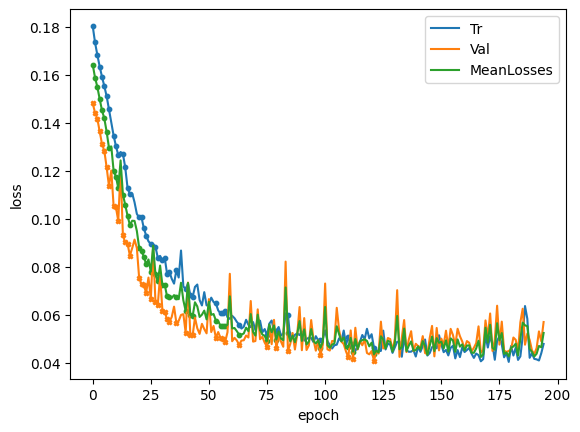

In [22]:
StartIDX = 5
plt.plot(Wine.history.history['loss'][StartIDX:], label='Tr')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['Loss'][StartIDX:], s=10)

plt.plot(Wine.history.history['val_loss'][StartIDX:], label='Val')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['VallLoss'][StartIDX:], s=10, marker='X')

MeanLosses = (np.array(Wine.history.history['loss']) + np.array(Wine.history.history['val_loss']))/2
plt.plot(MeanLosses[StartIDX:], label='MeanLosses')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['MeanLosses'][StartIDX:], s=10)

plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')